# Credit Card Fraud Detection
**Author**: `Terra Keeratinavanant`

**Description**: Logistic Regression model on imbalanced dataset to classify transactions as either fraud or non-fraud, evaluated by Area under the Precision-Recall curve (PR AUC)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Load Data and Data Exploration

In [4]:
# load data
df = pd.read_csv('/content/creditcard.csv')
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [5]:
df.shape

(23858, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23858 entries, 0 to 23857
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    23858 non-null  int64  
 1   V1      23858 non-null  float64
 2   V2      23858 non-null  float64
 3   V3      23858 non-null  float64
 4   V4      23858 non-null  float64
 5   V5      23858 non-null  float64
 6   V6      23858 non-null  float64
 7   V7      23858 non-null  float64
 8   V8      23858 non-null  float64
 9   V9      23858 non-null  float64
 10  V10     23858 non-null  float64
 11  V11     23858 non-null  float64
 12  V12     23858 non-null  float64
 13  V13     23858 non-null  float64
 14  V14     23858 non-null  float64
 15  V15     23858 non-null  float64
 16  V16     23858 non-null  float64
 17  V17     23858 non-null  float64
 18  V18     23858 non-null  float64
 19  V19     23858 non-null  float64
 20  V20     23858 non-null  float64
 21  V21     23858 non-null  float64
 22

- Column V1 to V28 contains numerical input variables which have been transformed with PCA
- Column 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset
- Column 'Amount' is the transaction Amount
- Column 'Class' is the response variable and it takes value 1 in case of fraud and 0 in case of non-fraud

## Data Preparation

In [7]:
# check and drop duplicates
print(df[df.duplicated() == True].shape)
df.drop_duplicates(inplace = True)

(88, 31)


In [8]:
# check missing values
print(df.isna().sum().sort_values(ascending = False))
df.dropna(inplace = True)

Class     1
Amount    1
V28       1
V27       1
V26       1
V25       1
V24       1
V23       1
V22       1
V16       0
V21       0
V20       0
V19       0
V18       0
V17       0
Time      0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
V15       0
dtype: int64


In [9]:
# Select feature and target variables
X = df.drop(columns = ['Time', 'Class'])
y = df[['Class']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 20, stratify = y)

In [10]:
# check for outliers
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,...,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000,23769.000000
mean,18218.729732,-0.236445,0.195949,0.726993,0.246567,-0.187845,0.081124,-0.131099,0.024434,0.497907,...,-0.043517,-0.136208,-0.038712,0.014257,0.127656,0.028403,0.014857,0.005333,74.144322,0.003702
std,11368.809895,1.893111,1.532917,1.727244,1.442011,1.441706,1.329249,1.335732,1.371680,1.274832,...,0.826667,0.643571,0.526725,0.588490,0.435935,0.520546,0.394139,0.267292,213.112535,0.060735
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.338556,-8.567638,-9.617915,0.000000,0.000000
25%,6661.000000,-0.956695,-0.377867,0.288072,-0.660604,-0.766422,-0.665128,-0.593896,-0.167477,-0.332013,...,-0.253882,-0.560649,-0.173786,-0.325137,-0.135252,-0.336730,-0.066100,-0.009373,6.000000,0.000000
50%,20563.000000,-0.287352,0.192032,0.875386,0.213949,-0.217453,-0.182294,-0.065700,0.027057,0.420638,...,-0.104895,-0.109512,-0.048559,0.064767,0.164379,-0.045193,0.006407,0.020000,18.130000,0.000000
75%,29001.000000,1.165284,0.839497,1.505851,1.120826,0.325381,0.471409,0.451309,0.285195,1.261368,...,0.066353,0.273465,0.074144,0.400973,0.407827,0.315742,0.095121,0.077540,66.400000,0.000000
max,32954.000000,1.960497,16.713389,4.101716,11.927512,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,3.695503,5.525093,3.517346,11.135740,4.860769,7879.420000,1.000000


## Data Analysis

In [11]:
print(y_train['Class'].value_counts())
print(y_train['Class'].value_counts(normalize = True))

Class
0.0    16576
1.0       62
Name: count, dtype: int64
Class
0.0    0.996274
1.0    0.003726
Name: proportion, dtype: float64


This is an imbalanced dataset; thus, I use undersampling technique

In [12]:
train_data = pd.concat([X_train, y_train], axis=1)

fraud = train_data[train_data['Class'] == 1]
non_fraud = train_data[train_data['Class'] == 0]

# Set the sample size to match the minority class
non_fraud_undersampled = resample(non_fraud,
                                  replace = False,
                                  n_samples = len(fraud),  # Match fraud count
                                  random_state = 20)

balanced_df = pd.concat([non_fraud_undersampled, fraud])
balanced_df = balanced_df.sample(frac=1, random_state=20).reset_index(drop=True)

# Check new class distribution
balanced_df['Class'].value_counts()

X_under = balanced_df.drop(columns = ['Class'])
y_under = balanced_df['Class']

### Remove Outliers

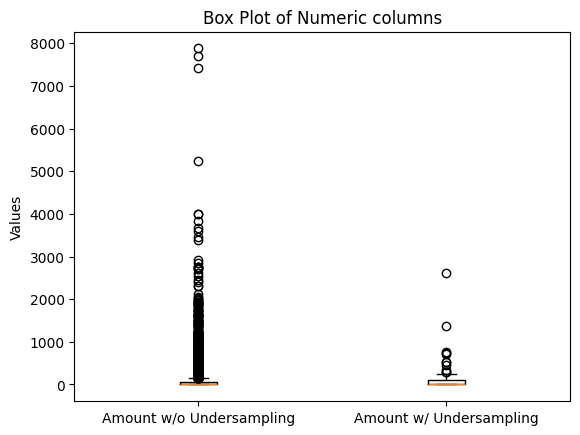

In [13]:
# Outliers visualization in 'Amount' column

plt.boxplot([X_train['Amount'], X_under['Amount']])
plt.title('Box Plot of Numeric columns')
plt.xticks([1,2], ['Amount w/o Undersampling', 'Amount w/ Undersampling'])
plt.ylabel('Values')

plt.show()

Capping X_train w/o Undersampling

In [14]:
# Capping based on percentiles for each numeric column in the DataFrame
X_train_capped = X_train.copy()
lower_cap = X_train_capped.quantile(0.01)
upper_cap = X_train_capped.quantile(0.99)

# replace values that are not within 1st to 99th percentile with 1st or 99th percentile
for col in X_train_capped.columns:
    X_train_capped[col] = np.where(X_train_capped[col] < lower_cap[col], lower_cap[col],
                                   np.where(X_train_capped[col] > upper_cap[col], upper_cap[col], X_train_capped[col]))

X_train_capped

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
13921,-0.762390,1.173514,2.377054,1.701356,-0.041482,1.007249,-0.259012,0.457060,1.293357,-1.197847,...,0.221381,-0.029382,0.705484,-0.455660,-0.094075,0.435209,0.056211,0.402200,0.164126,2.50
9520,1.121609,-0.145771,1.480542,1.009611,-1.120967,-0.069899,-0.854116,0.159776,2.036449,-0.424911,...,-0.174600,-0.182653,-0.157797,0.060789,0.493452,0.151562,0.250111,-0.017872,0.011795,11.50
20616,0.697329,-0.726242,-0.489396,0.782959,-0.297002,-0.775116,0.750234,-0.371627,-0.134586,-0.172455,...,0.571189,0.106391,-0.378589,-0.407027,-0.057486,0.523897,0.363656,-0.112054,0.057257,326.00
23447,0.753313,-0.768786,0.799361,1.518937,-0.954293,0.461790,-0.412175,0.376007,0.958265,-0.156293,...,-0.000715,0.054376,0.032022,-0.177780,0.199743,0.433413,-0.313635,0.027093,0.037818,169.00
3670,-0.381216,0.720980,1.238813,-1.957210,0.012114,-1.691911,1.180657,-0.463885,0.811801,-1.150091,...,0.019261,0.081877,0.614558,-0.255598,0.717246,0.029428,-0.859682,0.239271,-0.010377,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21925,-0.296993,0.856494,-0.111775,0.155037,2.528213,3.845694,0.096508,0.971143,-0.417045,0.005541,...,0.271681,-0.120516,-0.150791,-0.233198,1.015268,0.137759,-0.237378,0.417792,0.200234,2.98
9115,-1.166352,0.606921,1.874791,0.600488,1.580855,-0.558089,0.702418,-0.911101,1.267124,0.319712,...,0.242981,-0.661425,-0.924212,-0.538240,-0.509336,0.042847,0.188672,-0.545836,-0.449834,4.56
16615,1.258097,0.345732,0.301529,0.693073,-0.382091,-1.074146,0.075177,-0.194566,0.056218,-0.277778,...,-0.092047,-0.290207,-0.843069,0.131235,0.335567,0.211906,0.095347,-0.023934,0.030300,0.99
5637,-0.751303,-0.109522,1.126209,-1.416973,-0.103199,-0.983279,0.553755,-0.259778,-0.452818,-0.056417,...,-0.624362,-0.840152,-1.711619,0.586271,0.209187,-0.436293,0.392592,-0.147293,-0.036920,64.46


Capping X_train w/ Undersampling

In [15]:
# Capping based on percentiles for each numeric column in the DataFrame
X_under_capped = X_under.copy()
lower_cap = X_under_capped .quantile(0.01)
upper_cap = X_under_capped .quantile(0.99)

# replace values that are not within 1st to 99th percentile with 1st or 99th percentile
for col in X_under_capped .columns:
    X_under_capped [col] = np.where(X_under_capped [col] < lower_cap[col], lower_cap[col],
                                   np.where(X_under_capped [col] > upper_cap[col], upper_cap[col], X_under_capped [col]))

X_under_capped

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.322031,-0.425512,0.149222,-0.787479,-0.694604,-0.671135,-0.240270,-0.154810,-1.372626,0.802332,...,-0.367801,-0.832361,-2.081382,0.287803,-0.024378,-0.135978,0.511903,-0.073447,0.006079,34.87
1,-0.715901,1.490554,1.200525,0.387644,-0.381068,-1.159496,0.310885,0.240425,0.670735,-1.119030,...,-0.017464,-0.342822,-0.813473,0.113408,0.601853,-0.193424,0.014644,0.091760,0.033299,13.48
2,-4.064005,3.100935,-1.188498,3.264633,-1.903562,0.320351,-0.954940,-2.855810,2.820829,1.015113,...,-0.531898,1.688665,-0.078845,0.193731,0.479496,-0.506603,-0.409863,-1.467821,-0.630605,179.66
3,-0.709876,1.465740,1.155651,-0.115279,0.780295,-0.404294,1.048414,-0.619833,1.557181,0.245733,...,0.498262,-0.619772,-0.948855,-0.200952,-0.545326,-0.007305,0.023200,-0.001676,-0.247756,17.99
4,0.329594,3.712889,-5.775935,6.078266,1.667359,-2.420168,-0.812891,0.133080,-2.214311,-5.134454,...,0.269773,0.156617,-0.652450,-0.551572,-0.716522,1.415717,0.555265,0.530507,0.404474,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,-0.081501,-0.851166,1.480417,-2.223839,-0.945418,0.552765,-0.178119,0.054306,-2.221048,1.257161,...,-0.066392,-0.272706,-0.520664,0.191698,-0.767268,-0.339315,-0.422356,-0.125419,-0.204733,108.00
120,0.919137,4.199633,-7.535607,7.426940,1.118215,-2.886722,-1.341036,0.363933,-2.203224,-4.137840,...,0.535435,0.316094,0.055179,0.210692,-0.417918,-0.911188,0.466524,0.627393,0.157851,1.00
121,1.132486,-0.156506,0.685281,0.916712,-0.890512,-0.809504,-0.106939,-0.117567,0.662697,-0.234752,...,-0.075166,-0.052243,-0.008936,-0.072837,0.770707,0.492543,0.521035,-0.033131,0.018367,44.95
122,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-6.715189,-13.596424,...,1.111502,-2.426933,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00


#### Standard Scaler
To address feature 'Amount' which have a different scale than other features

In [23]:
# Initialize scalers
scaler = StandardScaler()
scaler_under = StandardScaler()

X_train_capped['Amount'] = scaler.fit_transform(X_train_capped[['Amount']])
X_under_capped['Amount'] = scaler_under.fit_transform(X_under_capped[['Amount']])

# Copy X_test before transformation
X_test_under = X_test.copy()

# Transform the test data (use scaler fitted on training data)
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test_under['Amount'] = scaler_under.transform(X_test_under[['Amount']])

## Data Prediction
Using Logistic Regression model, The features variables will be V1 to V28 and Amount columns while the target variable is Class (Fraud/Non-Fraud). I excluded Time from feature variables as it is in the format of sequence, not timestamp, and hence, not meaningful for fraud detection.

In [24]:
# Build Logistic Regression model
model = LogisticRegression()
model.fit(X_train_capped, y_train)
y_pred_prob = model.predict_proba(X_test)[:, -1]

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Because this is an imbalanced dataset and I am focusing on performance of the positive class (detected as fraud), the score will be better represented using Area Under the Precision-Recall Curve (PR AUC)

In [25]:
# Compute precision and recall for various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)

# Calculate the area under the precision-recall curve (PR AUC)
pr_auc = auc(recall, precision)
print(f'Area Under the Precision-Recall Curve (PR AUC): {pr_auc}')

Area Under the Precision-Recall Curve (PR AUC): 0.718551180262774


## Data Prediction with Undersampling

In [26]:
model = LogisticRegression()
model.fit(X_under_capped, y_under)
y_pred_prob2 = model.predict_proba(X_test)[:, -1]

precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_pred_prob2)
pr_auc2 = auc(recall2, precision2)
print(f'Area Under the Precision-Recall Curve (PR AUC): {pr_auc2}')

Area Under the Precision-Recall Curve (PR AUC): 0.7574982283078737


## Data Visualization

### Precision-Recall Curve

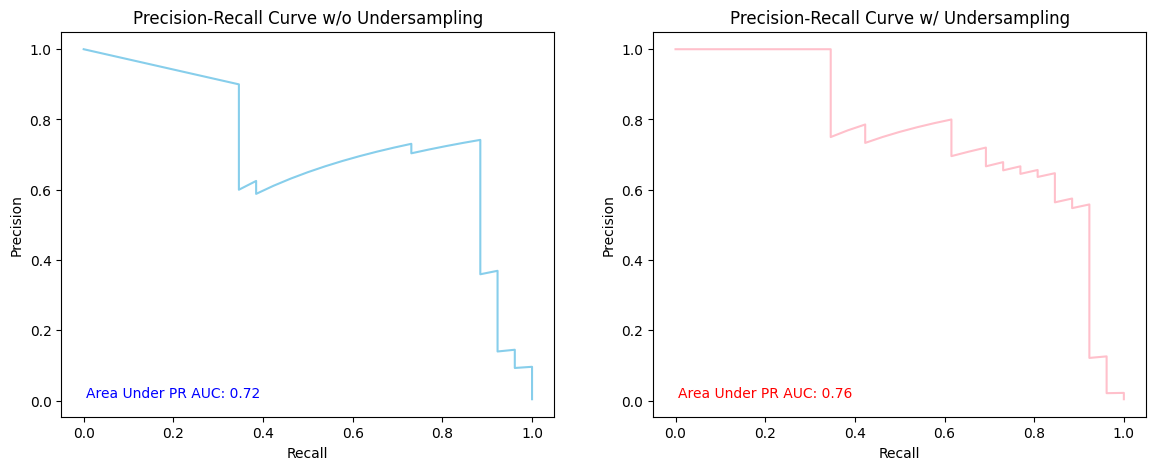

In [27]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.plot(recall, precision, color = 'skyblue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve w/o Undersampling')
plt.text(0.05, 0.05, f"Area Under PR AUC: {round(pr_auc, 2)}", fontsize=10, color='blue',
         transform=plt.gca().transAxes)

plt.subplot(1,2,2)
plt.plot(recall2, precision2, color = 'pink')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve w/ Undersampling')
plt.text(0.05, 0.05, f'Area Under PR AUC: {round(pr_auc2, 2)}', fontsize=10, color='red',
         transform=plt.gca().transAxes)

plt.show()


### Distribution of features in Original train VS test dataset

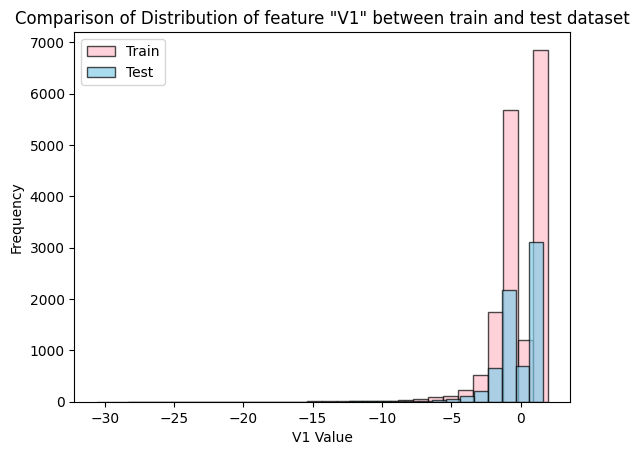

In [28]:
plt.hist(X_train['V1'], bins=30, alpha=0.7, label='Train', color = 'pink', edgecolor = 'black')
plt.hist(X_test['V1'], bins=30, alpha=0.7, label='Test', color = 'skyblue', edgecolor = 'black')
plt.title('Comparison of Distribution of feature "V1" between train and test dataset')
plt.xlabel('V1 Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

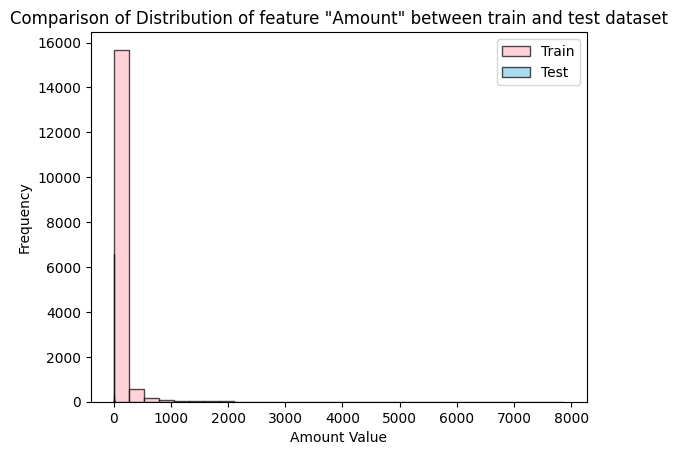

In [29]:
plt.hist(X_train['Amount'], bins=30, alpha=0.7, label='Train', color = 'pink', edgecolor = 'black')
plt.hist(X_test['Amount'], bins=30, alpha=0.7, label='Test', color = 'skyblue', edgecolor = 'black')
plt.title('Comparison of Distribution of feature "Amount" between train and test dataset')
plt.xlabel('Amount Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

### Transaction Class across Time in Original Dataset

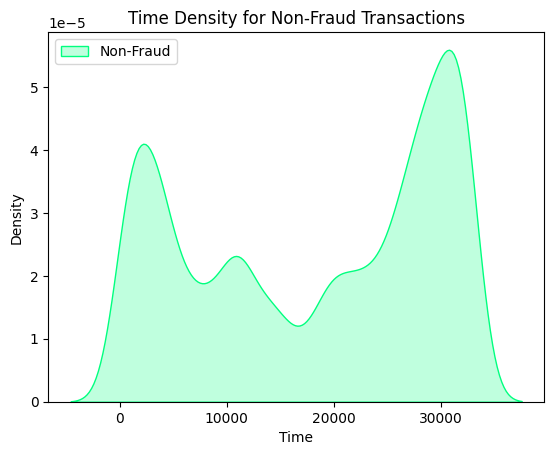

In [30]:
sns.kdeplot(df.loc[df['Class'] == 0, 'Time'], label='Non-Fraud', fill=True, color = 'springgreen')
plt.title('Time Density for Non-Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

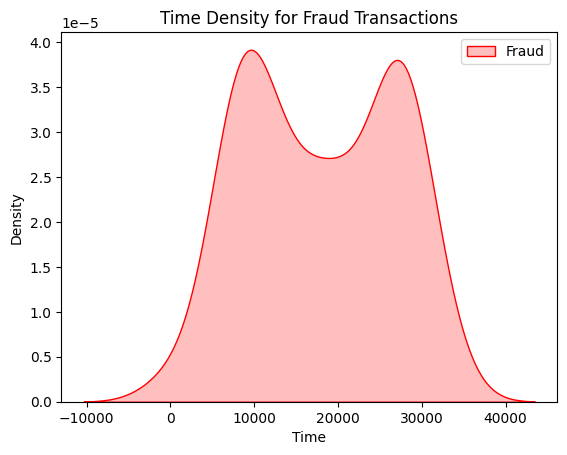

In [31]:
sns.kdeplot(df.loc[df['Class'] == 1, 'Time'], label = 'Fraud', fill = True, color = 'red')
plt.title('Time Density for Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.legend()
plt.show()

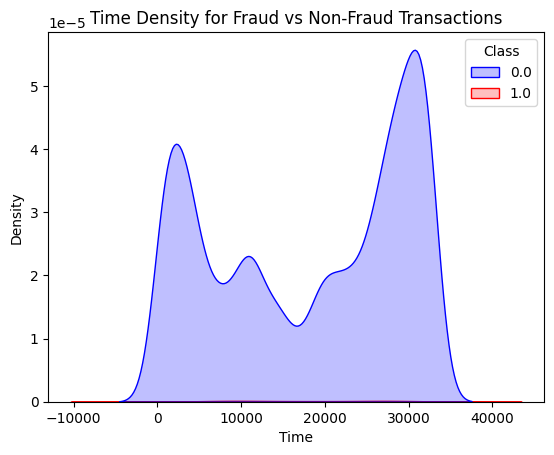

In [32]:
sns.kdeplot(data = df, x = 'Time', hue = 'Class', fill = True, palette = ['blue', 'red'])
plt.title('Time Density for Fraud vs Non-Fraud Transactions')
plt.xlabel('Time')
plt.ylabel('Density')
plt.show()